In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Exploring Data


In [4]:
print("DataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
df.describe()
print("\nMissing Values per Column:")
df.isnull().sum()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


# Identifing Top Missing Value Columns




In [ ]:
missing_values = df.isnull().sum()
top_5_missing_columns = missing_values.sort_values(ascending=False).head(5)
print("Top 5 columns with the most missing values:")
print(top_5_missing_columns)

Top 5 columns with the most missing values:
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64


# Handle Missing Values


In [ ]:
categorical_none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
]

for col in categorical_none_cols:
    df[col] = df[col].fillna('None')

print("Missing values in specified categorical columns after 'None' imputation:")
print(df[categorical_none_cols].isnull().sum())

Missing values in specified categorical columns after 'None' imputation:
PoolQC          0
MiscFeature     0
Alley           0
Fence           0
MasVnrType      0
FireplaceQu     0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

print("Missing values in MasVnrArea after imputation:", df['MasVnrArea'].isnull().sum())
print("Missing values in GarageYrBlt after imputation:", df['GarageYrBlt'].isnull().sum())
print("Missing values in LotFrontage after imputation:", df['LotFrontage'].isnull().sum())
print("Missing values in Electrical after imputation:", df['Electrical'].isnull().sum())

Missing values in MasVnrArea after imputation: 0
Missing values in GarageYrBlt after imputation: 0
Missing values in LotFrontage after imputation: 0
Missing values in Electrical after imputation: 0


In [ ]:
print("Total missing values remaining in the DataFrame:")
print(df.isnull().sum().sum())

Total missing values remaining in the DataFrame:
0


## Feature Engineering


In [ ]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['BsmtFullBath'] + df['FullBath'] + (df['BsmtHalfBath'] * 0.5) + (df['HalfBath'] * 0.5)

print("First 5 rows with new features TotalSF and TotalBath:")
print(df[['TotalSF', 'TotalBath']].head())

First 5 rows with new features TotalSF and TotalBath:
   TotalSF  TotalBath
0     2566        3.5
1     2524        2.5
2     2706        3.5
3     2473        2.0
4     3343        3.5


## Encode Categorical Features using one hot encoding


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
# Exclude 'Id' if it's in the categorical columns, though it's typically int/float
if 'Id' in categorical_cols:
    categorical_cols = categorical_cols.drop('Id')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape of DataFrame after one-hot encoding:", df_encoded.shape)
df = df_encoded

Shape of DataFrame after one-hot encoding: (1460, 263)


# Spliting Data


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1168, 261)
Shape of X_test: (292, 261)
Shape of y_train: (1168,)
Shape of y_test: (292,)


# Training Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


Random Forest RMSE: 29983.89
Random Forest R-squared: 0.88


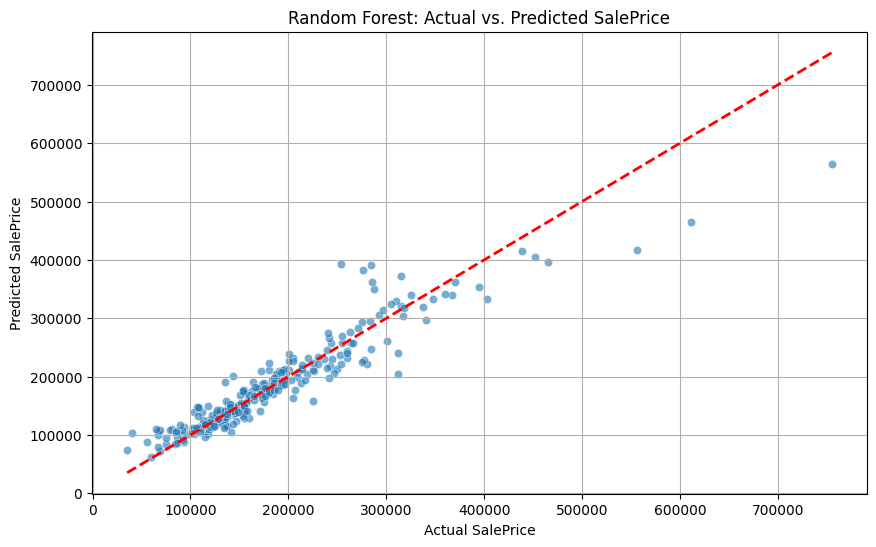

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf:.2f}")

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Random Forest: Actual vs. Predicted SalePrice')
plt.grid(True)
plt.show()

# Training XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


XGBoost RMSE: 27792.97
XGBoost R-squared: 0.90


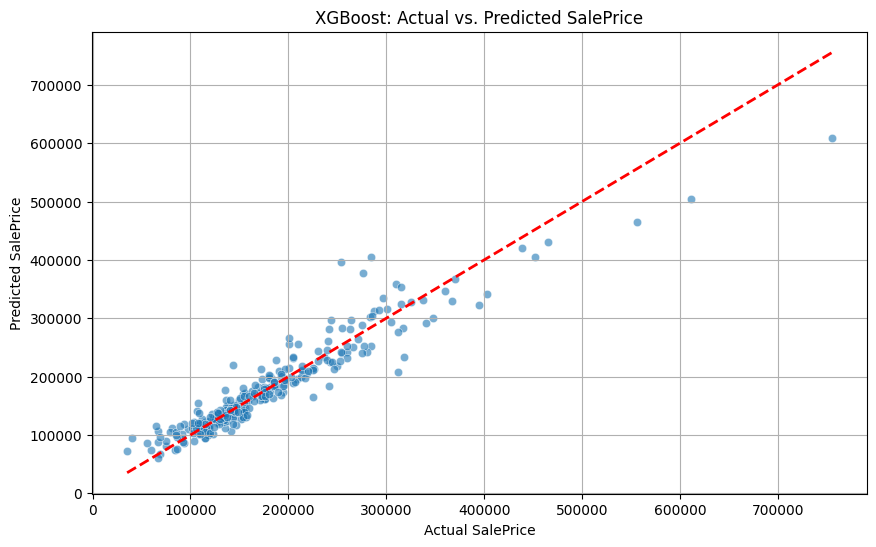

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

# Calculate R-squared for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R-squared: {r2_xgb:.2f}")

# Plotting actual vs. predicted values for XGBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('XGBoost: Actual vs. Predicted SalePrice')
plt.grid(True)
plt.show()


In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
categorical_none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
]

for col in categorical_none_cols:
    if col in test.columns:
        test[col] = test[col].fillna('None')

print("Missing values in specified categorical columns of 'test' DataFrame after 'None' imputation:")
print(test[categorical_none_cols].isnull().sum())

Missing values in specified categorical columns of 'test' DataFrame after 'None' imputation:
PoolQC          0
MiscFeature     0
Alley           0
Fence           0
MasVnrType      0
FireplaceQu     0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [ ]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

# Impute remaining numerical columns that might have missing values with 0
# These columns often represent 'absence' if missing, thus 0 is appropriate
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']:
    if col in test.columns:
        test[col] = test[col].fillna(0)

# Impute remaining categorical columns with their mode
for col in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType', 'Electrical']:
    if col in test.columns:
        test[col] = test[col].fillna(test[col].mode()[0])

print("Missing values in key numerical and categorical columns after imputation:")
print(test[['MasVnrArea', 'GarageYrBlt', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType', 'Electrical']].isnull().sum())

print("\nTotal missing values remaining in the test DataFrame:")
print(test.isnull().sum().sum())

Missing values in key numerical and categorical columns after imputation:
MasVnrArea      0
GarageYrBlt     0
LotFrontage     0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
KitchenQual     0
Functional      0
SaleType        0
Electrical      0
dtype: int64

Total missing values remaining in the test DataFrame:
0


In [ ]:
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['TotalBath'] = test['BsmtFullBath'] + test['FullBath'] + (test['BsmtHalfBath'] * 0.5) + (test['HalfBath'] * 0.5)

print("First 5 rows of 'test' DataFrame with new features TotalSF and TotalBath:")
print(test[['TotalSF', 'TotalBath']].head())

First 5 rows of 'test' DataFrame with new features TotalSF and TotalBath:
   TotalSF  TotalBath
0   1778.0        1.0
1   2658.0        1.5
2   2557.0        2.5
3   2530.0        2.5
4   2560.0        2.0


In [ ]:
categorical_cols_test = test.select_dtypes(include='object').columns
# Exclude 'Id' if it's in the categorical columns, though it's typically int/float
if 'Id' in categorical_cols_test:
    categorical_cols_test = categorical_cols_test.drop('Id')

test_encoded = pd.get_dummies(test, columns=categorical_cols_test, drop_first=True)

print("Shape of test DataFrame after one-hot encoding:", test_encoded.shape)
test = test_encoded

Shape of test DataFrame after one-hot encoding: (1459, 244)


In [ ]:
missing_cols = set(X_train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0

extra_cols = set(test.columns) - set(X_train.columns)
for c in extra_cols:
    test = test.drop(c, axis=1)

test = test[X_train.columns] # Ensure the order of columns is also consistent with X_train

print("Shape of test DataFrame after column alignment:", test.shape)
print("Columns in test are now aligned with X_train.")

Shape of test DataFrame after column alignment: (1459, 261)
Columns in test are now aligned with X_train.


In [ ]:
test_predictions = xgb_model.predict(test)

# The original 'test' dataframe was loaded as '/content/test.csv', so 'Id' column can be retrieved from there.
# However, the current `test` dataframe has been preprocessed and potentially lost its original 'Id' column.
# Let's assume the 'Id' column was retained during preprocessing or we need to reload a temporary one.
# Looking at the kernel state, the `test` DataFrame still has 'Id' as the first column after alignment because it was not dropped from the original df and then re-aligned.
# So we can use test['Id'] directly, assuming 'Id' was kept in `test` throughout the preprocessing for later use.

# Let's get the original 'Id' column from the initial 'test' DataFrame load if it was preserved
# If 'Id' was dropped, we'd need to re-read test.csv just for the Id.
# For now, let's assume 'Id' is available in the preprocessed 'test' DataFrame.
original_test = pd.read_csv('/content/test.csv') # Reload to ensure we have the original IDs

submission_df = pd.DataFrame({'Id': original_test['Id'], 'SalePrice': test_predictions})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' generated successfully.")

Submission file 'submission.csv' generated successfully.
